<a href="https://colab.research.google.com/github/ayseceyda/DogBreeds_EDA/blob/main/DogBreeds_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Köpek Irkları Verisetinin Tanımı**

Veriseti Kaynağı Linki: https://github.com/rfordatascience/tidytuesday/tree/master/data/2022/2022-02-01

Bir araya getirilen verisetlerinin kaynağı, [American Kennel Club (AKC) ](https://www.akc.org/) köpek kayıt sistemidir.

**Gereksinimlerin İndirilmesi ve Import Edilmesi**

In [ ]:
%pip install pandas matplotlib seaborn plotly_express lfs --upgrade --quiet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

**Verinin Çekilmesi**

Keşifsel veri analizi sırasında kullanılacak olan kaynaklar, 2 farklı veri setinden oluşmaktadır:

**1. breed_traits.csv:** Köpek cinslerinin karakteristik özelliklerini ve bu özelliklere ait skor bilgisini içerir.

**2. breed_rank_all.csv:** 2013 ve 2020 yılları arasındaki, köpek türlerinin popülerliğini inceleyen AKC kayıt sistemi istatiklerini içerir.

**trait_description.csv:** Skor değerlerine ait detaylı açıklama ve yorumları içerir. Dataset, analiz aşamasında kullanılmamış olup sonuçları yorumlama noktasında kullanılmıştır.

In [ ]:
breed_rank_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2022/2022-02-01/breed_rank.csv'
breed_rank_df  = pd.read_csv(breed_rank_url)

In [ ]:
breed_traits_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2022/2022-02-01/breed_traits.csv'
breed_traits_df  = pd.read_csv(breed_traits_url)

In [ ]:
trait_description_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2022/2022-02-01/trait_description.csv'
trait_description_df  = pd.read_csv(trait_description_url)
trait_description_df

,Trait,Trait_1,Trait_5,Description
0,Affectionate With Family,Independent,Lovey-Dovey,How affectionate a breed is likely to be with ...
1,Good With Young Children,Not Recommended,Good With Children,A breed's level of tolerance and patience with...
2,Good With Other Dogs,Not Recommended,Good With Other Dogs,How generally friendly a breed is towards othe...
3,Shedding Level,No Shedding,Hair Everywhere,How much fur and hair you can expect the breed...
4,Coat Grooming Frequency,Monthly,Daily,"How frequently a breed requires bathing, brush..."
5,Drooling Level,Less Likely to Drool,Always Have a Towel,How drool-prone a breed tends to be. If you're...
6,Coat Type,-,-,"Canine coats come in many different types, dep..."
7,Coat Length,-,-,How long the breed's coat is expected to be. S...
8,Openness To Strangers,Reserved,Everyone Is My Best Friend,How welcoming a breed is likely to be towards ...
9,Playfulness Level,Only When You Want To Play,Non-Stop,How enthusiastic about play a breed is likely ...


# **Verisetinde Ön İşleme Adımları**

In [ ]:
# BREED RANK DATASETİ İNCELEMESİ

breed_rank_df.head() # Analiz esnasında, Links ve Image kolonları kullanılmayacaktır, bu sebeple drop edilmişlerdir.
breed_rank_df = breed_rank_df.drop("links", axis='columns')
breed_rank_df = breed_rank_df.drop("Image", axis='columns')
breed_rank_df # 195 satır, 9 sütun

,Breed,2013 Rank,2014 Rank,2015 Rank,2016 Rank,2017 Rank,2018 Rank,2019 Rank,2020 Rank
0,Retrievers (Labrador),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,French Bulldogs,11.0,9.0,6.0,6.0,4.0,4.0,4.0,2
2,German Shepherd Dogs,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3
3,Retrievers (Golden),3.0,3.0,3.0,3.0,3.0,3.0,3.0,4
4,Bulldogs,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5
...,...,...,...,...,...,...,...,...,...
190,Cesky Terriers,174.0,182.0,179.0,182.0,185.0,185.0,190.0,191
191,American Foxhounds,176.0,180.0,181.0,189.0,187.0,186.0,191.0,192
192,Azawakhs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193
193,English Foxhounds,177.0,183.0,184.0,187.0,189.0,188.0,195.0,194


In [ ]:
# Null Değer İncelemesi

breed_rank_df.isna().sum() # 2020 hariç tüm yıllarda, null değer gelen sıralama değerleri olduğu gözlemlenmektedir.

,0
Breed,0
2013 Rank,19
2014 Rank,19
2015 Rank,19
2016 Rank,19
2017 Rank,19
2018 Rank,19
2019 Rank,20
2020 Rank,0


In [ ]:
# Null gelen satırların (köpek cinsleri) tespit edilip verisetlerinden çıkarılması gerekmektedir.
# Eksik veri bulunduran toplam 20 köpek cinsi -1 ile doldurulup cins isimleri tespit edilmiştir.

breed_rank_df = breed_rank_df.fillna(-1)
df_2019_Rank_Null = breed_rank_df[breed_rank_df["2019 Rank"] == -1 ]
print(df_2019_Rank_Null['Breed'])

30      Miniature American Shepherds
79                   Coton de Tulear
82                      Rat Terriers
87                 Lagotti Romagnoli
92                   Dogo Argentinos
122                        Boerboels
128       American Hairless Terriers
142                            Pulik
144                          Barbets
148               Spanish Water Dogs
150                   Berger Picards
154               Wirehaired Vizslas
155                            Pumik
161       Nederlandse Kooikerhondjes
166                     Plott Hounds
172             Bergamasco Sheepdogs
178               Cirnechi dell Etna
187    Grand Basset Griffon Vendeens
188                         Sloughis
192                         Azawakhs
Name: Breed, dtype: object


In [ ]:
# -1 ile işaretlenen NA değerli köpek cinsleri, verisetinden drop edilmiştir.
breed_to_remove = ["Miniature American Shepherds","Coton de Tulear","Rat Terriers","Lagotti Romagnoli","Dogo Argentinos","Boerboels","American Hairless Terriers","Pulik",	"Barbets","Spanish Water Dogs","Berger Picards",	"Wirehaired Vizslas","Pumik","Nederlandse Kooikerhondjes",	"Plott Hounds", "Bergamasco Sheepdogs","Cirnechi dell Etna","Grand Basset Griffon Vendeens","Sloughis","Azawakhs"]
breed_rank_df = breed_rank_df[~breed_rank_df['Breed'].isin(breed_to_remove)]

# Veri tipleri analiz edilmiştir.
display(breed_rank_df.dtypes)

# 2013-2019 yılları arasındaki Rank değerleri float tipinde iken 2020 yılındaki Rank değeri int tipindedir.,
# Rank küsürat içeren bir değer olamayacağı için veri tipleri int' e çevrilmiştir.
breed_rank_df['2013 Rank'] = breed_rank_df['2013 Rank'].astype(int)
breed_rank_df['2014 Rank'] = breed_rank_df['2014 Rank'].astype(int)
breed_rank_df['2015 Rank'] = breed_rank_df['2015 Rank'].astype(int)
breed_rank_df['2016 Rank'] = breed_rank_df['2016 Rank'].astype(int)
breed_rank_df['2017 Rank'] = breed_rank_df['2017 Rank'].astype(int)
breed_rank_df['2018 Rank'] = breed_rank_df['2018 Rank'].astype(int)
breed_rank_df['2019 Rank'] = breed_rank_df['2019 Rank'].astype(int)

# Veri Boyutu

rows = len(breed_rank_df.axes[0])
cols = len(breed_rank_df.axes[1])

print("Final Number of Rows: ", rows) # 175
print("Final Number of Columns: ", cols)

# Kolonlar arasındaki boşluk yerine '_' karakteri eklenmiştir.
breed_rank_df.columns.values[1] = '2013_Rank'
breed_rank_df.columns.values[2] = '2014_Rank'
breed_rank_df.columns.values[3] = '2015_Rank'
breed_rank_df.columns.values[4] = '2016_Rank'
breed_rank_df.columns.values[5] = '2017_Rank'
breed_rank_df.columns.values[6] = '2018_Rank'
breed_rank_df.columns.values[7] = '2019_Rank'
breed_rank_df.columns.values[8] = '2020_Rank'

breed_rank_df


,0
Breed,object
2013 Rank,float64
2014 Rank,float64
2015 Rank,float64
2016 Rank,float64
2017 Rank,float64
2018 Rank,float64
2019 Rank,float64
2020 Rank,int64


Final Number of Rows:  175
Final Number of Columns:  9


,Breed,2013_Rank,2014_Rank,2015_Rank,2016_Rank,2017_Rank,2018_Rank,2019_Rank,2020_Rank
0,Retrievers (Labrador),1,1,1,1,1,1,1,1
1,French Bulldogs,11,9,6,6,4,4,4,2
2,German Shepherd Dogs,2,2,2,2,2,2,2,3
3,Retrievers (Golden),3,3,3,3,3,3,3,4
4,Bulldogs,5,4,4,4,5,5,5,5
...,...,...,...,...,...,...,...,...,...
189,Harriers,173,181,183,186,183,189,188,190
190,Cesky Terriers,174,182,179,182,185,185,190,191
191,American Foxhounds,176,180,181,189,187,186,191,192
193,English Foxhounds,177,183,184,187,189,188,195,194


In [ ]:
# BREED TRAITS DATASETİ İNCELEMESİ

breed_traits_df # 195 satır, 17 sütun

,Breed,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Coat Type,Coat Length,Openness To Strangers,Playfulness Level,Watchdog/Protective Nature,Adaptability Level,Trainability Level,Energy Level,Barking Level,Mental Stimulation Needs
0,Retrievers (Labrador),5,5,5,4,2,2,Double,Short,5,5,3,5,5,5,3,4
1,French Bulldogs,5,5,4,3,1,3,Smooth,Short,5,5,3,5,4,3,1,3
2,German Shepherd Dogs,5,5,3,4,2,2,Double,Medium,3,4,5,5,5,5,3,5
3,Retrievers (Golden),5,5,5,4,2,2,Double,Medium,5,4,3,5,5,3,1,4
4,Bulldogs,4,3,3,3,3,3,Smooth,Short,4,4,3,3,4,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Cesky Terriers,4,5,3,2,2,1,Wavy,Medium,4,3,3,4,3,3,3,3
191,American Foxhounds,3,5,5,3,1,1,Smooth,Short,3,3,3,3,3,4,5,3
192,Azawakhs,3,3,3,2,2,1,Smooth,Short,1,3,3,3,2,3,1,3
193,English Foxhounds,5,5,5,3,1,2,Double,Short,4,4,3,4,4,4,5,4


In [ ]:
breed_traits_df.isna().sum() # Null bir değer dönmemektedir.

,0
Breed,0
Affectionate With Family,0
Good With Young Children,0
Good With Other Dogs,0
Shedding Level,0
Coat Grooming Frequency,0
Drooling Level,0
Coat Type,0
Coat Length,0
Openness To Strangers,0


In [ ]:
# Breed Rank verisetinden, Null olduğu için çıkartılan 20 köpek cinsi, verisetlerinin birleştirilmesi öncesinde
# Breed Traits verisetinden de çıkartılmalıdır. Breed Traits verisetinde, 6 köpek cinsi ismi verilerek çıkarılabiliyorken,
# 14 köpek cinsi isminde özel karakter içerdiği için index kullanılarak verisetinden çıkarılmıştır.

print(df_2019_Rank_Null['Breed'])
breed_traits_df = breed_traits_df.loc[breed_traits_df.index.drop([30, 79, 82, 87, 92, 128, 148, 150, 154, 161, 166, 172, 178, 187])]

breed_to_remove = ["Miniature American Shepherds","Coton de Tulear","Rat Terriers","Lagotti Romagnoli","Dogo Argentinos","Boerboels","American Hairless Terriers","Pulik",	"Barbets","Spanish Water Dogs","Berger Picards",	"Wirehaired Vizslas","Pumik","Nederlandse Kooikerhondjes",	"Plott Hounds", "Bergamasco Sheepdogs","Cirnechi dell Etna","Grand Basset Griffon Vendeens","Sloughis","Azawakhs"]
breed_traits_df = breed_traits_df[~breed_traits_df['Breed'].isin(breed_to_remove)]

# Unique değer kontrolü yapılmıştır.

breed_traits_df.nunique()

# Veri Boyutu

rows = len(breed_traits_df.axes[0])
cols = len(breed_traits_df.axes[1])

print("Final Number of Rows: ", rows) # 175
print("Final Number of Columns: ", cols)

breed_traits_df


30      Miniature American Shepherds
79                   Coton de Tulear
82                      Rat Terriers
87                 Lagotti Romagnoli
92                   Dogo Argentinos
122                        Boerboels
128       American Hairless Terriers
142                            Pulik
144                          Barbets
148               Spanish Water Dogs
150                   Berger Picards
154               Wirehaired Vizslas
155                            Pumik
161       Nederlandse Kooikerhondjes
166                     Plott Hounds
172             Bergamasco Sheepdogs
178               Cirnechi dell Etna
187    Grand Basset Griffon Vendeens
188                         Sloughis
192                         Azawakhs
Name: Breed, dtype: object
Final Number of Rows:  175
Final Number of Columns:  17


,Breed,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Coat Type,Coat Length,Openness To Strangers,Playfulness Level,Watchdog/Protective Nature,Adaptability Level,Trainability Level,Energy Level,Barking Level,Mental Stimulation Needs
0,Retrievers (Labrador),5,5,5,4,2,2,Double,Short,5,5,3,5,5,5,3,4
1,French Bulldogs,5,5,4,3,1,3,Smooth,Short,5,5,3,5,4,3,1,3
2,German Shepherd Dogs,5,5,3,4,2,2,Double,Medium,3,4,5,5,5,5,3,5
3,Retrievers (Golden),5,5,5,4,2,2,Double,Medium,5,4,3,5,5,3,1,4
4,Bulldogs,4,3,3,3,3,3,Smooth,Short,4,4,3,3,4,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Harriers,5,5,5,3,1,2,Double,Short,4,4,3,4,4,4,5,4
190,Cesky Terriers,4,5,3,2,2,1,Wavy,Medium,4,3,3,4,3,3,3,3
191,American Foxhounds,3,5,5,3,1,1,Smooth,Short,3,3,3,3,3,4,5,3
193,English Foxhounds,5,5,5,3,1,2,Double,Short,4,4,3,4,4,4,5,4


In [ ]:
# VERİSETLERİNİN BİRLEŞTİRİLMESİ

# Breed ortak kolonunu taşıyan "Breed Rank" ve "Breed Traits" verisetleri birleştirilmiştir.
final_dataset = pd.concat([breed_traits_df, breed_rank_df], axis=1)

# Birleşim sonrası duplike olan Breed kolonlarından bir tanesi yeniden adlandırılarak verisetinden çıkartılmıştır.
final_dataset.columns.values[17] = "Breed_Drop"
final_dataset = final_dataset.drop(['Breed_Drop'], axis=1)
final_dataset

# Birleşim sonrası Null kontrolü yapılmıştır.

print(final_dataset.isna().sum())

# Birleşim sonrası Unique değer kontrolü yapılmıştır.

final_dataset.nunique()

# Veri Boyutu

rows = len(final_dataset.axes[0])
cols = len(final_dataset.axes[1])

print("Final Number of Rows: ", rows) # 175
print("Final Number of Columns: ", cols)

# Veriye ait İstatistik

print(final_dataset.describe())

final_dataset.head(10)


Breed                         0
Affectionate With Family      0
Good With Young Children      0
Good With Other Dogs          0
Shedding Level                0
Coat Grooming Frequency       0
Drooling Level                0
Coat Type                     0
Coat Length                   0
Openness To Strangers         0
Playfulness Level             0
Watchdog/Protective Nature    0
Adaptability Level            0
Trainability Level            0
Energy Level                  0
Barking Level                 0
Mental Stimulation Needs      0
2013_Rank                     0
2014_Rank                     0
2015_Rank                     0
2016_Rank                     0
2017_Rank                     0
2018_Rank                     0
2019_Rank                     0
2020_Rank                     0
dtype: int64
Final Number of Rows:  175
Final Number of Columns:  25
       Affectionate With Family  Good With Young Children  \
count                175.000000                175.000000   
mean     

,Breed,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Coat Type,Coat Length,Openness To Strangers,...,Barking Level,Mental Stimulation Needs,2013_Rank,2014_Rank,2015_Rank,2016_Rank,2017_Rank,2018_Rank,2019_Rank,2020_Rank
0,Retrievers (Labrador),5,5,5,4,2,2,Double,Short,5,...,3,4,1,1,1,1,1,1,1,1
1,French Bulldogs,5,5,4,3,1,3,Smooth,Short,5,...,1,3,11,9,6,6,4,4,4,2
2,German Shepherd Dogs,5,5,3,4,2,2,Double,Medium,3,...,3,5,2,2,2,2,2,2,2,3
3,Retrievers (Golden),5,5,5,4,2,2,Double,Medium,5,...,1,4,3,3,3,3,3,3,3,4
4,Bulldogs,4,3,3,3,3,3,Smooth,Short,4,...,2,3,5,4,4,4,5,5,5,5
5,Poodles,5,5,3,1,4,1,Curly,Long,5,...,4,5,8,7,8,7,7,7,6,6
6,Beagles,3,5,5,3,2,1,Smooth,Short,3,...,4,4,4,5,5,5,6,6,7,7
7,Rottweilers,5,3,3,3,1,3,Smooth,Short,3,...,1,5,9,10,9,8,8,8,8,8
8,Pointers (German Shorthaired),5,5,4,3,2,2,Smooth,Short,4,...,3,5,13,12,11,11,10,9,9,9
9,Dachshunds,5,3,4,2,2,2,Smooth,Short,4,...,5,3,10,11,13,13,13,12,11,10


# **Keşifler ve Hipotez**

**HİPOTEZ:** Halk arasında popüler/trend olarak görülen köpek türlerinin seçiminde: Aile, çocuklarla, yabancılarla anlaşabilme ve oyuncu olma özelliklerinin gelişmiş olması özellikleri sıralamayı pozitif yönde etkilerken; havlama seviyesi, salyalanma miktarı ve tüy dökme miktarının fazla olması sıralamayı negatif yönde etkiler.

**Olumlu Karakteristikler:**
* Aile ile Sevecen Olma
* Küçük Çocuklarla İyi Anlaşabilme
* Yabancılara karşı açıklık
* Oyuncu Olma

**Olumsuz Karakteristikler:**
* Salyalanma Miktarı
* Havlama Seviyesi
* Tüy Dökme Miktarı

**1. KEŞİF:** Sıralama (Breed Rank) verisi işlenmeden önce, hipotezde verilen karakteristikler yakın çağrışımlar yaptığı için, aralarında herhangi bir ilişki olup olmadığı Correlation Heatmap kullanılarak analiz edilmiştir.

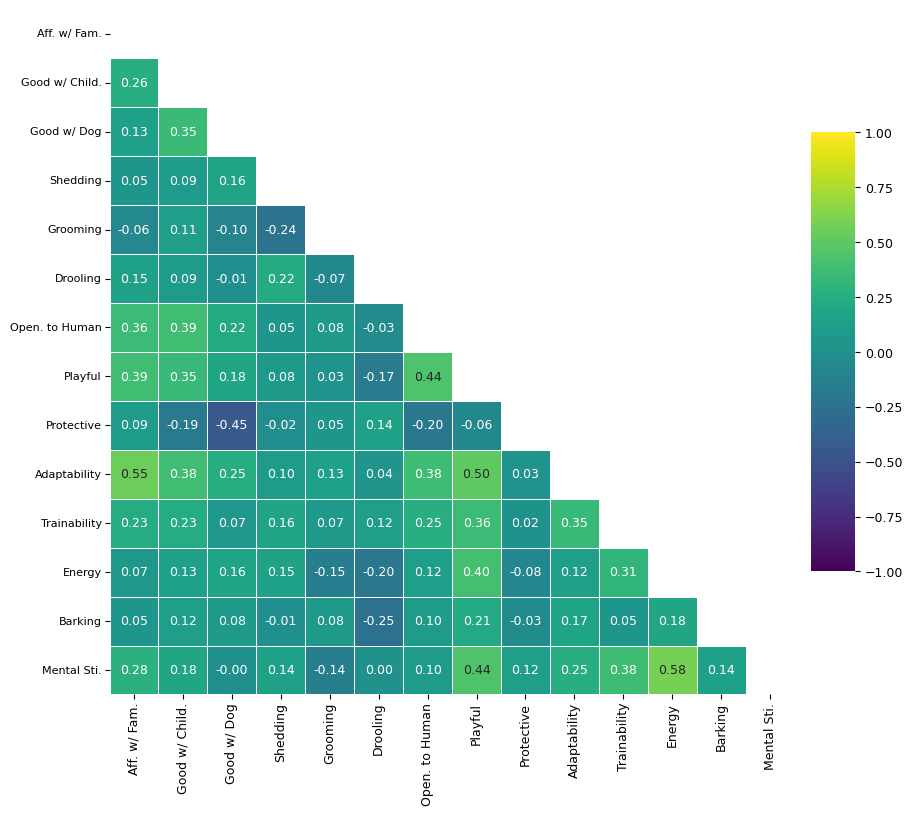

In [ ]:
# 1. GRAFİK - CORRELATION HEATMAP

import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

# Köpek cinslerine ait özellikler kolonlarında, birbiri ile pozitif ya da negatif korelasyonu olabileceği düşünülen kolonlar bulunmaktadır.

# print(breed_traits_df.dtypes)

# Breed, Coat Type ve Coat Length kolonları, veri tipleri uygun olmadığı için dataframe' den çıkartılmıştır.

breed_traits_df_corr = breed_traits_df.drop('Breed', axis=1)
breed_traits_df_corr = breed_traits_df.drop('Coat Type', axis=1)
breed_traits_df_corr = breed_traits_df.drop('Coat Length', axis=1)

# Kolon Adlarının Kısaltılması
new_labels = {
       'Affectionate With Family': 'Aff. w/ Fam.',
       'Good With Young Children': 'Good w/ Child.',
       'Good With Other Dogs': 'Good w/ Dog',
       'Shedding Level': 'Shedding',
       'Coat Grooming Frequency': 'Grooming',
       'Drooling Level': 'Drooling',
       'Energy Level': 'Energy',
       'Playfulness Level': 'Playful',
       'Barking Level': 'Barking',
       'Mental Stimulation Needs': 'Mental Sti.',
       'Adaptability Level': 'Adaptability',
       'Openness To Strangers': 'Open. to Human',
       'Watchdog/Protective Nature': 'Protective',
       'Trainability Level': 'Trainability'
   }

# Korelasyon Matrisinin Çıkartılması
breed_traits_for_corr = breed_traits_df_corr.select_dtypes(include=['int64'])
correlation_matrix = breed_traits_for_corr.corr()
correlation_matrix = correlation_matrix.rename(columns=new_labels, index=new_labels)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Yüksek Çözünürlük - Rapor
#plt.figure(figsize = (15, 12), dpi = 150) # kolon adlarının x eksenine sığması için matris büyütüldü ve çözünürlük arttırıldı
#hx.set_xticklabels(hx.get_xticklabels(), rotation=0, horizontalalignment='center', fontsize=8) # isimler yatay hale getirildi

# Normal Görünüm
plt.figure(figsize = (10, 10))
plt.rcParams.update({'font.size': 9})
hx = sns.heatmap(correlation_matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask=mask,
cbar_kws={"shrink": 0.5, "aspect": 10, "pad": 0.02}) # legend büyüklüğü güncellendi
hx.set_xticklabels(hx.get_xticklabels(), horizontalalignment='center', fontsize=9)
hx.set_yticklabels(hx.get_yticklabels(), fontsize=8)
hx.xaxis.set_tick_params(pad=2) # x ekseni ile arasındaki boşluk azaltıldı
hx.yaxis.set_tick_params(pad=2) # y ekseni ile arasındaki boşluk azaltıldı
plt.tight_layout(pad=3.0)


**Korelasyon Matrisinin Analizi**

**Bazı Pozitif Korelasyonlar**

*  Zihinsel olarak uyarım ihtiyacı (Mental Stimulation Needs) özelliği ve enerji seviyesi (Energy Level) özelliği arasında 0.58 oranında pozitif korelasyon gözlemlemekteyiz.
*  Aile ile sevecen olma (Affectionate With Family) özelliği ile uyum sağlama özelliği (Adaptability Level) arasında 0.55 oranında pozitif korelasyon gözlemlemekteyiz.
*   Oyuncu olma seviyesi (Playfulness Level) özelliği ve uyum sağlama özelliği (Adaptability Level) arasında 0.50 oranında pozitif korelasyon gözlemlemekteyiz.
*   Zihinsel olarak uyarım ihtiyacı (Mental Stimulation Needs) özelliği ve oyuncu olma seviyesi (Playfulness Level) arasında 0.44 oranında pozitif korelasyon gözlemlemekteyiz.
*    Yabancılara karşı açıklık (Openness To Strangers) özelliği ve oyuncu olma seviyesi (Playfulness Level) arasında 0.44 oranında pozitif korelasyon gözlemlemekteyiz.
*   Yabancılara karşı açıklık (Openness To Strangers) özelliği ve küçük çocuklarla iyi anlaşabilme (Good With Young Children) özelliği arasında 0.39 oranında pozitif korelasyon gözlemlemekteyiz.

**Bazı Negatif Korelasyonlar**

*    Koruma içgüdüsü özelliği (Watchdog/Protective Nature) ile diğer köpeklerle iyi geçinme (Good With Other Dogs) özelliği arasında 0.45 oranında negatif korelasyon gözlemlenmiştir.
*   Salyalanma miktarı (Drooling Level) ile havlama düzeyi (Barking Level) arasında 0.25 oranında negatif korelasyon gözlemlenmiştir.
* Tüy Dökme (Shedding Level) özelliği ve taranma ihtiyacı sıklığı (Coat Grooming Frequency) arasında 0.24 oranında negatif korelasyon gözlemlenmiştir.

**2. KEŞİF:** Korelasyon matrisinde birbirleri ile olan korelasyon değerleri incelenen ve hipotezde olumlu ya da olumsuz olarak betimlenen bazı köpek karakteristiklerine ait analizler dağılım grafiği kullanılarak detaylandırılmıştır.

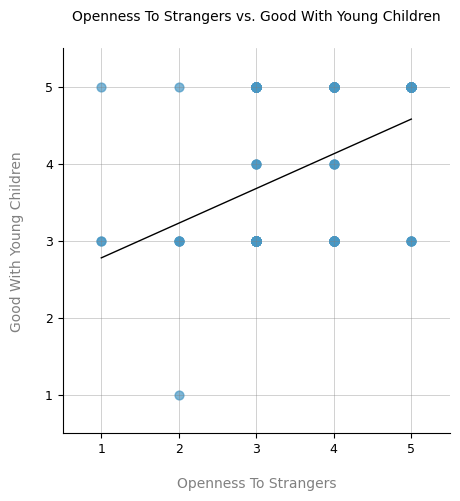

In [ ]:
# 2. GRAFİK - SCATTER

# 1. SUBPLOT -> Yabancılara karşı açıklık (Openness To Strangers) özelliği ve küçük çocuklarla iyi anlaşabilme (Good With Young Children) özelliği arasındaki ilişki incelenmiştir.

import matplotlib.pyplot as plt
import seaborn as sns

font1 = {'family': 'sans-serif', 'size': 10, 'color': 'grey'}

plt.rcParams['figure.figsize'] = (5, 5)

sns.regplot(
    x='Openness To Strangers',
    y='Good With Young Children',
    data=breed_traits_df_corr,
    ci=None,
    line_kws={"color": "black", "lw": 1},
    scatter_kws={"s": 40, "alpha": 0.7, "color": "#4898c5"}
)

px = plt.gca()
px.spines['top'].set_visible(False)
px.spines['right'].set_visible(False)

plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

plt.title('Openness To Strangers vs. Good With Young Children',  fontsize=10, pad=20)
plt.xlabel('Openness To Strangers', fontdict=font1, labelpad=15)
plt.ylabel('Good With Young Children', fontdict=font1, labelpad=15)

px.set_facecolor('white')

plt.xlim(0.5, 5.5)
plt.ylim(0.5, 5.5)

plt.show()

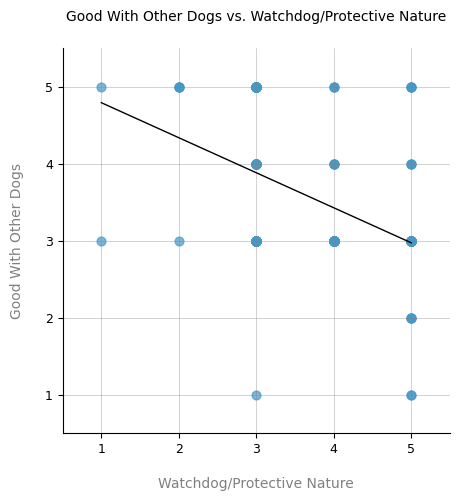

In [ ]:
# 2. SUBPLOT -> Koruma içgüdüsü özelliği  (Watchdog/Protective Nature) ve diğer köpeklerle iyi geçinme (Good With Other Dogs) özelliği arasındaki ilişki incelenmiştir.

import matplotlib.pyplot as plt
import seaborn as sns

font1 = {'family': 'sans-serif', 'size': 10, 'color': 'grey'}

plt.rcParams['figure.figsize'] = (5, 5)

sns.regplot(
    x='Watchdog/Protective Nature',
    y='Good With Other Dogs',
    data=breed_traits_df_corr,
    ci=None,
    line_kws={"color": "black", "lw": 1},
    scatter_kws={"s": 40, "alpha": 0.7, "color": "#4898c5"}
)

px = plt.gca()
px.spines['top'].set_visible(False)
px.spines['right'].set_visible(False)

plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

plt.title('Good With Other Dogs vs. Watchdog/Protective Nature',  fontsize=10, pad=20)
plt.xlabel('Watchdog/Protective Nature', fontdict=font1, labelpad=15)
plt.ylabel('Good With Other Dogs', fontdict=font1, labelpad=15)

px.set_facecolor('white')

plt.xlim(0.5, 5.5)
plt.ylim(0.5, 5.5)

plt.show()

**1. ve 2. Yardımcı Dağılım Grafiklerinin Analizi**

**1. Subplot**: Bu grafik ile yabancılara karşı açıklık skoru yüksek olan köpek cinslerinin, küçük çocuklara iyi anlaşma eğiliminde olduğu gözlemlenmiştir. İki değişken arasında pozitif korelasyondan söz edilebilir. Yine de verisetinde, yabancılara karşı açık olmayıp çocuklarla iyi anlaşabilen köpek cinslerinin de mevcut olduğu outlier örnekler görülmüştür.

**2. Subplot:** Koruma içgüdüsü skoru yüksek olan köpeklerin, diğer köpeklerle iyi anlaşamama eğiliminde olduğu gözlemlenmiştir. İki değişken arasında negatif korelasyondan söz edilebilir. Veride sıradışı bir outlier gözlemlenmemiştir.

**3. KEŞİF:** Verisetindeki tüm yıllarda (ilk ve son 4 sıralamasına girmiş) köpek cinslerine ait bazı **olumlu** ve birbirleri ile korelasyonu olan karakteristiklerin popülerlik sıralamasıyla olan ilişkisi sütun grafiği kullanılarak araştırılmıştır.

In [ ]:
# Veriseti içerisindeki tüm zamanlarda ilk 3 ve son 1 sıralamasına girme sıklığı en fazla olan 4 köpek cins seçilmiştir.

%pip install pandasql
from pandasql import sqldf
import pandas as pd

# Tüm zamanlarda (2013-2020) Popüler Olan (Sıralamada İlk 3' e Giren) 4 Köpek Cinsi -> 1.Retrievers (Labrador), 2.French Bulldogs, 3.German Shepherd Dogs, 4. Retrievers (Golden)

print('En Popüler 1.Sıra:' + sqldf('''SELECT [Breed] FROM final_dataset WHERE [2013_Rank] = 1 OR [2014_Rank] = 1 OR [2015_Rank] = 1 OR [2016_Rank] = 1 OR [2017_Rank] = 1 OR [2018_Rank] = 1 OR [2019_Rank] = 1 OR [2020_Rank] = 1'''))

print('En Popüler 2.Sıra:' + sqldf('''SELECT [Breed] FROM final_dataset WHERE [2013_Rank] = 2 OR [2014_Rank] = 2 OR [2015_Rank] = 2 OR [2016_Rank] = 2 OR [2017_Rank] = 2 OR [2018_Rank] = 2 OR [2019_Rank] = 2 OR [2020_Rank] = 2'''))

print('En Popüler 3.Sıra:' + sqldf('''SELECT [Breed] FROM final_dataset WHERE [2013_Rank] = 3 OR [2014_Rank] = 3 OR [2015_Rank] = 3 OR [2016_Rank] = 3 OR [2017_Rank] = 3 OR [2018_Rank] = 3 OR [2019_Rank] = 3 OR [2020_Rank] = 3'''))

# Tüm zamanlarda (2013-2020) Popüler Olmayan (Sıralamada Sonuncu) 4 Köpek Cinsi      -> 1.Canaan Dogs, 2.American English Coonhounds, 3.Chinooks, 4.Norwegian Lundehunds

print('En Az Popüler:' + sqldf('''SELECT [Breed] FROM final_dataset WHERE [2013_Rank] = 175 OR [2014_Rank] = 175 OR [2015_Rank] = 175 OR [2016_Rank] = 175 OR [2017_Rank] = 175 OR [2018_Rank] = 175 OR [2019_Rank] = 175 OR [2020_Rank] = 175'''))

                                     Breed
0  En Popüler 1.Sıra:Retrievers (Labrador)
                                    Breed
0       En Popüler 2.Sıra:French Bulldogs
1  En Popüler 2.Sıra:German Shepherd Dogs
                                    Breed
0  En Popüler 3.Sıra:German Shepherd Dogs
1   En Popüler 3.Sıra:Retrievers (Golden)
                                       Breed
0            En Az Popüler:Spaniels (Sussex)
1     En Az Popüler:Polish Lowland Sheepdogs
2                En Az Popüler:Skye Terriers
3                  En Az Popüler:Canaan Dogs
4  En Az Popüler:American English Coonhounds
5                     En Az Popüler:Chinooks
6         En Az Popüler:Norwegian Lundehunds


In [ ]:
# Tüm zamanlarda, popülerlik sıralamasındaki en popüler ve en az popüler olan 4 köpek cinsi, hipotezde sıralamaya olumlu etkisi olduğu öne sürülen bazı karakteristik
# özellikler noktasında karşılaştırılmıştır.

# Bazı Olumlu Özellikler ile Subset OLuşturulması
best_features_dataframe = final_dataset[['Breed','Good With Young Children', 'Affectionate With Family', 'Adaptability Level', 'Playfulness Level', 'Openness To Strangers']]

# Sıralamada ilk 4'e giren köpek cinslerinin hipotezdeki olumlu özelliklerle olan bağlantısını incelemek için subset oluşturulmuştur.
best_features_top_4_df = best_features_dataframe[:4]
print(best_features_top_4_df)

# Sıralamada son 4'e giren köpek cinslerinin hipotezdeki olumlu özelliklerle olan bağlantısını incelemek için subset oluşturulmuştur.
best_features_last_4_df = best_features_dataframe[-9:]
best_features_last_4_df = best_features_last_4_df.drop([best_features_last_4_df.index[3], best_features_last_4_df.index[4],  best_features_last_4_df.index[5],  best_features_last_4_df.index[6],  best_features_last_4_df.index[7]])
print(best_features_last_4_df)

                   Breed  Good With Young Children  Affectionate With Family  \
0  Retrievers (Labrador)                         5                         5   
1        French Bulldogs                         5                         5   
2   German Shepherd Dogs                         5                         5   
3    Retrievers (Golden)                         5                         5   

   Adaptability Level  Playfulness Level  Openness To Strangers  
0                   5                  5                      5  
1                   5                  5                      5  
2                   5                  4                      3  
3                   5                  4                      5  
                           Breed  Good With Young Children  \
183                  Canaan Dogs                         3   
184  American English Coonhounds                         3   
185                     Chinooks                         5   
194         Norwegian

<ipython-input-63-c0fbaeed8970>:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(['Fr. Bulldog','Retrievers(Lab.)','Retrievers(Gol.)', 'Ger. Shepherd'], fontsize=9, ha='right')
<ipython-input-63-c0fbaeed8970>:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['Nor.Lundehunds','AE. Coonhound','Canaan','Chinooks'], fontsize=9, ha='right')


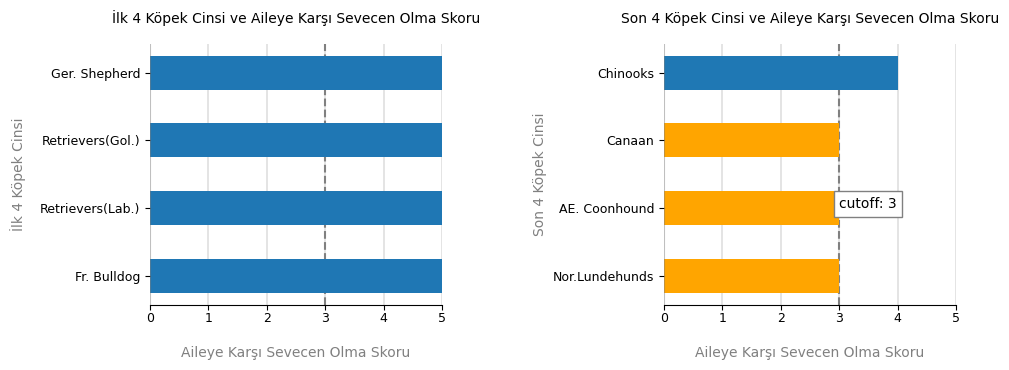

In [ ]:
# 3. GRAFİK - BAR CHART

# Popülerlik sıralamasında ilk ve son 4' e giren köpek cinslerinin, sıralamaya pozitif etkisi kanıtlanmak istenen,
# Aileye Karşı Sevecen Olma (Affectionate With Family) ve Oyuncu Olma (Playfulness Level) özellikleri ile ilişkisi bar chart kullanılarak araştırılmıştır.
# 1. SUBPLOT -> Sıralamadaki İlk 4 Köpek Cinsi ve Aileye Karşı Sevecen Olma Skoru Grafiği
# 2. SUBPLOT -> Sıralamadaki Son 4 Köpek Cinsi ve Aileye Karşı Sevecen Olma Skoru Grafiği

import matplotlib.pyplot as plt
import numpy as np

cutoff = 3 # eşik değer
color_cutoff = 3
highlight_colour = '#FFA500' # turuncu, eşik değere eşit ya da altında kalırsa
non_highlight_colour = '#1f78b4' # mavi, eşik değerin üzerine çıkarsa

best_features_top_4_df = best_features_top_4_df.sort_values(by='Affectionate With Family')
best_features_last_4_df = best_features_last_4_df.sort_values(by='Affectionate With Family')

best_features_last_4_df['colors'] = best_features_last_4_df['Affectionate With Family'].apply(lambda x:highlight_colour if x <= color_cutoff else non_highlight_colour)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

font1 = {'family': 'sans-serif', 'size': 10, 'color': 'grey'}

for i in range(1, 6):
  ax1.axvline(x=i, zorder=0, color='grey', ls='-', lw=0.3)
  ax2.axvline(x=i, zorder=0, color='grey', ls='-', lw=0.3)

ax1.axvline(x=0, linestyle='-', color='grey', alpha=0.5)
ax2.axvline(x=0, linestyle='-', color='grey', alpha=0.5)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

# 1. SUBPLOT - İlk 4 Köpek Cinsi ve Aileye Karşı Sevecen Olma Skoru

bars1 = ax1.barh(best_features_top_4_df['Breed'], best_features_top_4_df['Affectionate With Family'], height=0.5)
ax1.set_xticks(np.arange(0, 6))
ax1.set_xlim([0, 5])
ax1.xaxis.set_visible(True)
ax1.axvline(x=cutoff, zorder=0, color='grey', ls='--', lw=1.5)
ax1.set_title('İlk 4 Köpek Cinsi ve Aileye Karşı Sevecen Olma Skoru', fontsize=10, pad=15)
ax1.set_xlabel("Aileye Karşı Sevecen Olma Skoru", fontdict=font1, labelpad=15)
ax1.xaxis.set_tick_params(pad=2)
ax1.set_ylabel("İlk 4 Köpek Cinsi", fontdict=font1, labelpad=10)
ax1.set_yticklabels(['Fr. Bulldog','Retrievers(Lab.)','Retrievers(Gol.)', 'Ger. Shepherd'], fontsize=9, ha='right')

# 2. SUBPLOT - Son 4 Köpek Cinsi ve Aileye Karşı Sevecen Olma Skoru

bars2 = ax2.barh(best_features_last_4_df['Breed'], best_features_last_4_df['Affectionate With Family'], height=0.5, color = best_features_last_4_df['colors'])
ax2.set_xticks(np.arange(0, 6))
ax2.set_xlim([0, 5])
ax2.xaxis.set_visible(True)
ax2.axvline(x=cutoff, zorder=0, color='grey', ls='--', lw=1.5)
ax2.text(x=cutoff, y=1, s=f'cutoff: {cutoff}', ha='left', fontsize=10, bbox=dict(facecolor='white', edgecolor='grey')) # cutoff etiketi
ax2.set_title('Son 4 Köpek Cinsi ve Aileye Karşı Sevecen Olma Skoru', fontsize=10, pad=15)
ax2.set_xlabel("Aileye Karşı Sevecen Olma Skoru", fontdict=font1, labelpad=15)
ax2.xaxis.set_tick_params(pad=2)
ax2.set_ylabel("Son 4 Köpek Cinsi", fontdict=font1)
ax2.set_yticklabels(['Nor.Lundehunds','AE. Coonhound','Canaan','Chinooks'], fontsize=9, ha='right')

# iki grafik arası boşluğun konumlandırılması
plt.tight_layout(pad=2.0, w_pad=7.0, h_pad=3.0)
plt.show()

**1. ve 2. Yardımcı Sütun Grafiklerinin Analizi**

Bu grafikler ile birlikte, sıralamadaki ilk ve son 4 köpek cinsinin, hipotezde olumlu olarak sunulan **Aileye Karşı Sevecen Olma** özelliğini nasıl yansıttığı incelenmiştir.

**Aileye Karşı Sevecen Olma Seviyesi**' ne baktığımızda ilk 4 köpeğin tamamı eşik değerin üzerinde maksimum değere sahipken; son 3 köpek eşik değerine eşit ve 1 köpek ise eşik değerinin üzerinde değere sahiptir. Bu durum da, hipotezde sunulan, aileye karşı sevecen olma seviyesinin köpek cinsinin popülerlik sıralamasını olumlu etkilediğini göstermiştir.

<ipython-input-64-accb49516a53>:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_yticklabels(['Fr. Bulldog','Retrievers(Lab.)','Retrievers(Gol.)', 'Ger. Shepherd'], fontsize=9, ha='right')
<ipython-input-64-accb49516a53>:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_yticklabels(['Chinooks','Nor.Lundehunds','AE. Coonhound','Canaan'], fontsize=9, ha='right')


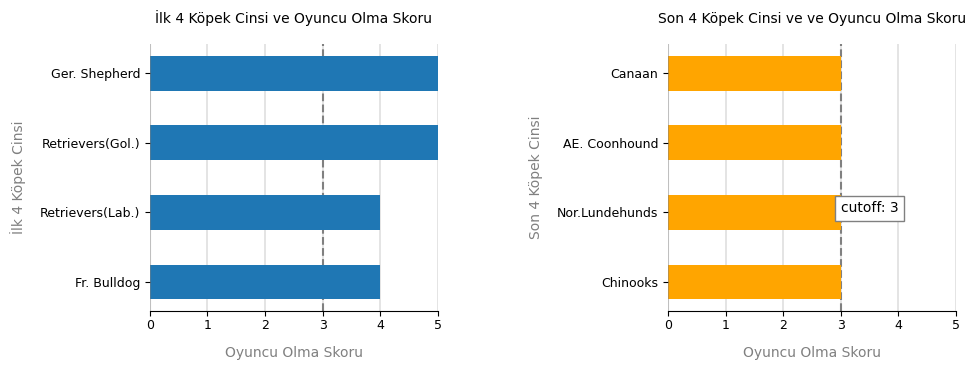

In [ ]:
# 3. SUBPLOT -> Sıralamadaki İlk 4 Köpek Cinsi ve Oyuncu Olma Skoru Grafiği
# 4. SUBPLOT -> Sıralamadaki Son 4 Köpek Cinsi ve Oyuncu Olma Skoru Grafiği

import matplotlib.pyplot as plt
import numpy as np

cutoff = 3 # eşik değer
color_cutoff = 3
highlight_colour = '#FFA500' # turuncu, eşik değere eşit ya da altında kalırsa
non_highlight_colour = '#1f78b4' # mavi, eşik değerin üzerine çıkarsa

best_features_top_4_df = best_features_top_4_df.sort_values(by='Playfulness Level')
best_features_last_4_df = best_features_last_4_df.sort_values(by='Playfulness Level')

best_features_last_4_df['colors'] = best_features_last_4_df['Playfulness Level'].apply(lambda x:highlight_colour if x <= color_cutoff else non_highlight_colour)

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(10, 4))

font1 = {'family': 'sans-serif', 'size': 10, 'color': 'grey'}

for i in range(1, 6):
  ax3.axvline(x=i, zorder=0, color='grey', ls='-', lw=0.3)
  ax4.axvline(x=i, zorder=0, color='grey', ls='-', lw=0.3)

ax3.axvline(x=0, linestyle='-', color='grey', alpha=0.5)
ax4.axvline(x=0, linestyle='-', color='grey', alpha=0.5)

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)

# 3. SUBPLOT - İlk 4 Köpek Cinsi ve Oyuncu Olma

bars1 = ax3.barh(best_features_top_4_df['Breed'], best_features_top_4_df['Playfulness Level'], height=0.5)
ax3.set_xticks(np.arange(0, 6))
ax3.set_xlim([0, 5])
ax3.xaxis.set_visible(True)
ax3.axvline(x=cutoff, zorder=0, color='grey', ls='--', lw=1.5)
#ax3.text(x=cutoff, y=1, s=f'cutoff: {cutoff}', ha='left', fontsize=10, bbox=dict(facecolor='white', edgecolor='grey'))
ax3.set_title('İlk 4 Köpek Cinsi ve Oyuncu Olma Skoru', fontsize=10, pad=15)
ax3.set_xlabel("Oyuncu Olma Skoru", fontdict=font1, labelpad=10)
ax3.xaxis.set_tick_params(pad=2)
ax3.set_ylabel("İlk 4 Köpek Cinsi", fontdict=font1, labelpad=10)
ax3.set_yticklabels(['Fr. Bulldog','Retrievers(Lab.)','Retrievers(Gol.)', 'Ger. Shepherd'], fontsize=9, ha='right')

# 2. SUBPLOT - Son 4 Köpek Cinsi ve Oyuncu Olma

bars2 = ax4.barh(best_features_last_4_df['Breed'], best_features_last_4_df['Playfulness Level'], height=0.5, color = best_features_last_4_df['colors'])
ax4.set_xticks(np.arange(0, 6))
ax4.set_xlim([0, 5])
ax4.xaxis.set_visible(True)
ax4.axvline(x=cutoff, zorder=0, color='grey', ls='--', lw=1.5)
ax4.text(x=cutoff, y=1, s=f'cutoff: {cutoff}', ha='left', fontsize=10, bbox=dict(facecolor='white', edgecolor='grey')) # cutoff etiketi
ax4.set_title('Son 4 Köpek Cinsi ve ve Oyuncu Olma Skoru', fontsize=10, pad=15)
ax4.set_xlabel("Oyuncu Olma Skoru", fontdict=font1, labelpad=10)
ax4.xaxis.set_tick_params(pad=2)
ax4.set_ylabel("Son 4 Köpek Cinsi", fontdict=font1, labelpad=10)
ax4.set_yticklabels(['Chinooks','Nor.Lundehunds','AE. Coonhound','Canaan'], fontsize=9, ha='right')

# iki grafik arası boşluğun konumlandırılması
plt.tight_layout(pad=2.0, w_pad=7.0, h_pad=3.0)
plt.show()

**3. ve 4. Yardımcı Sütun Grafiklerinin Analizi**

Bu grafikler ile birlikte, sıralamadaki ilk ve son 4 köpek cinsinin, hipotezde olumlu olarak sunulan **Oyuncu Olma** özelliğini nasıl yansıttığı incelenmiştir.

**Oyuncu Olma Seviyesi**' ne baktığımızda ilk 4 köpeğin tamamı eşik değerin üzerinde değerlere sahipken; son 4 köpeğin tamamı eşik değerine eşit değerlere sahiptir. Bu durum da, hipotezde sunulan, oyuncu olma seviyesinin köpek cinsinin popülerlik sıralamasını olumlu etkilediğini göstermiştir.

In [ ]:
# Tüm zamanlarda, popülerlik sıralamasındaki en popüler ve en az popüler olan 4 köpek cinsi, hipotezde sıralamaya
# olumsuz etkisi olduğu öne sürülen bazı karakteristik özellikler noktasında karşılaştırılmıştır.

# Bazı Olumsuz Özellikler ile Subset Oluşturulması
worst_features_dataframe = final_dataset[['Breed','Shedding Level', 'Barking Level', 'Drooling Level']]

# Sıralamada ilk 4'e giren köpek cinslerinin hipotezdeki olumsuz özelliklerle olan bağlantısını incelemek için subset oluşturulmuştur.
worst_features_top_4_df = worst_features_dataframe[:4]
print(worst_features_top_4_df)

# Sıralamada son 4'e giren köpek cinslerinin hipotezdeki olumsuz özelliklerle olan bağlantısını incelemek için subset oluşturulmuştur.
worst_features_last_4_df = worst_features_dataframe[-9:]
worst_features_last_4_df = worst_features_last_4_df.drop([worst_features_last_4_df.index[3], worst_features_last_4_df.index[4],  worst_features_last_4_df.index[5],  worst_features_last_4_df.index[6],  worst_features_last_4_df.index[7]])
print(worst_features_last_4_df)

                   Breed  Shedding Level  Barking Level  Drooling Level
0  Retrievers (Labrador)               4              3               2
1        French Bulldogs               3              1               3
2   German Shepherd Dogs               4              3               2
3    Retrievers (Golden)               4              1               2
                           Breed  Shedding Level  Barking Level  \
183                  Canaan Dogs               4              5   
184  American English Coonhounds               2              4   
185                     Chinooks               3              5   
194         Norwegian Lundehunds               3              3   

     Drooling Level  
183               1  
184               1  
185               1  
194               1  


**4. KEŞİF:** Verisetindeki tüm yıllarda (ilk ve son 4 sıralamasına girmiş) köpek cinslerine ait bazı **olumsuz** ve birbirleri ile korelasyonu olan karakteristiklerin popülerlik sıralamasıyla olan ilişkisi gruplandırılmış sütun grafiği kullanılarak araştırılmıştır.

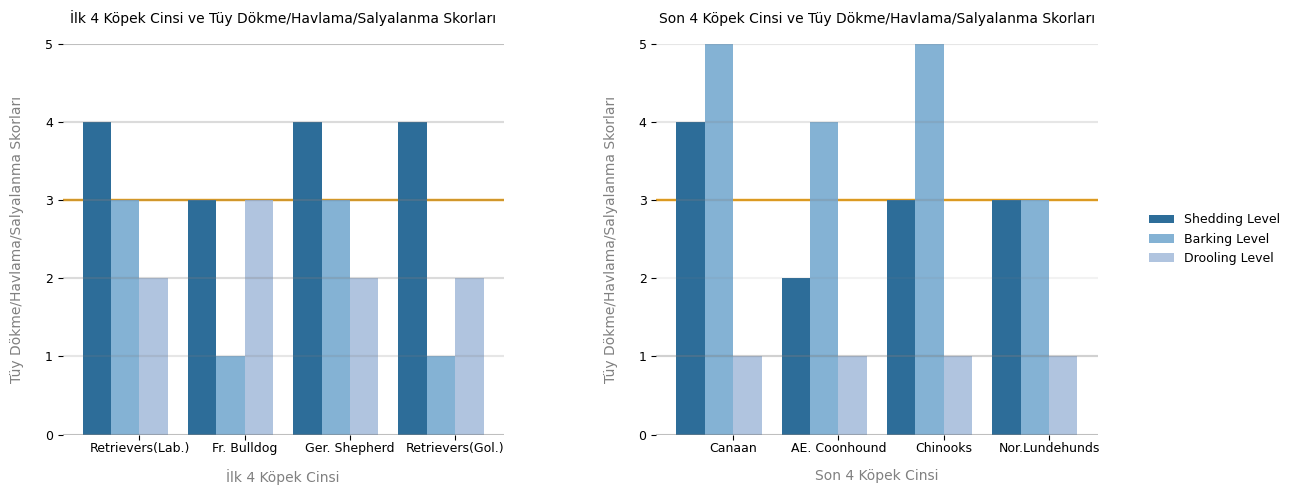

In [ ]:
# 4. GRAFİK - GROUPED BAR CHART

# Popülerlik sıralamasında ilk ve son 4' e giren köpek cinslerinin, sıralamaya negatif etkisi kanıtlanmak istenen, Tüy Dökme Miktarı (Shedding Level),
# Havlama Miktarı (Barking Level) ve Salyalanma Miktarı (Drooling Level) özellikleri ile ilişkisi grouped bar chart kullanılarak araştırılmıştır.

import matplotlib.pyplot  as plt
import matplotlib.patches as mpatches
import numpy as np

bar_width = 0.27
top_4_breeds = worst_features_top_4_df['Breed'].unique()
bottom_4_breeds = worst_features_last_4_df['Breed'].unique()
features = ['Shedding Level', 'Barking Level', 'Drooling Level']

colors = ['#2d6d99', '#84b2d4', '#b0c4df']
font2 = {'family': 'sans-serif', 'size': 10, 'color': 'grey'}
fig, (bx1, bx2) = plt.subplots(1, 2, figsize=(13, 5))

bx1.axhline(y=cutoff, zorder=0, color='orange', ls='-', lw=1.7)
bx2.axhline(y=cutoff, zorder=0, color='orange', ls='-', lw=1.7)

bx1.axhline(y=5, linestyle='-', color='grey', alpha=0.5)
bx1.axhline(y=0, linestyle='-', color='grey', alpha=0.5)
bx2.axhline(y=0, linestyle='-', color='grey', alpha=0.5)

bx1.spines['top'].set_visible(False)
bx1.spines['right'].set_visible(False)
bx1.spines['bottom'].set_visible(False)
bx1.spines['left'].set_visible(False)

bx2.spines['top'].set_visible(False)
bx2.spines['right'].set_visible(False)
bx2.spines['bottom'].set_visible(False)
bx2.spines['left'].set_visible(False)

# 1. SUBPLOT - İlk 4 Köpek Cinsi ve Tüy Dökme Miktarı, Havlama Miktarı ve Salyalanma Miktarı Skorları

x_pos_top_4 = np.arange(len(top_4_breeds))
for i, feature in enumerate(features):
    bars = bx1.bar(x_pos_top_4 + (i * bar_width), worst_features_top_4_df[feature], bar_width, label=feature, color=colors[i % len(colors)])
    for bar in bars:
        bx1.axhline(y=bar.get_height(), linestyle='-', color='grey', alpha=0.1)

bx1.set_yticks(np.arange(0, 6))
bx1.set_ylim([0, 5])
bx1.set_xticks(x_pos_top_4 + (bar_width * (len(features) / 2)))
bx1.set_xticklabels(['Retrievers(Lab.)','Fr. Bulldog','Ger. Shepherd','Retrievers(Gol.)'], fontsize=9, ha='center')
bx1.set_ylabel("Tüy Dökme/Havlama/Salyalanma Skorları", fontdict=font2, labelpad=15)
bx1.set_xlabel("İlk 4 Köpek Cinsi", fontdict=font2, labelpad=10)
bx1.xaxis.set_tick_params(pad=2)
bx1.set_title('İlk 4 Köpek Cinsi ve Tüy Dökme/Havlama/Salyalanma Skorları', fontsize=10, pad=15)

# 2. SUBPLOT - Son 4 Köpek Cinsi ve Tüy Dökme Miktarı, Havlama Miktarı ve Salyalanma Miktarı Skorları

x_pos_bottom_4 = np.arange(len(bottom_4_breeds))
for i, feature in enumerate(features):
    bars = bx2.bar(x_pos_bottom_4 + (i * bar_width), worst_features_last_4_df[feature], bar_width, label=feature, color=colors[i % len(colors)])
    for bar in bars:
        bx2.axhline(y=bar.get_height(), linestyle='-', color='grey', alpha=0.1)

bx2.set_yticks(np.arange(0, 6))
bx2.set_ylim([0, 5])
bx2.set_xticks(x_pos_bottom_4 + (bar_width * (len(features) / 2)))
bx2.set_xticklabels(['Canaan','AE. Coonhound','Chinooks','Nor.Lundehunds'],fontsize=9, ha='center')
bx2.set_ylabel("Tüy Dökme/Havlama/Salyalanma Skorları", fontdict=font2, labelpad=15)
bx2.set_xlabel("Son 4 Köpek Cinsi", fontdict=font2, labelpad=10)
bx2.xaxis.set_tick_params(pad=2)
bx2.set_title('Son 4 Köpek Cinsi ve Tüy Dökme/Havlama/Salyalanma Skorları', fontsize=10, pad=15)

# legend' ın konumlandırılması

bx2.legend()
legend = bx2.get_legend()
legend = plt.legend(loc="right", edgecolor="white", borderaxespad=-15)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0, 0))

# iki grafik arası boşluğun konumlandırılması
plt.tight_layout(pad=1.0, w_pad=8.0, h_pad=3.0)
plt.show()

**Gruplandırılmış Sütun Grafiğinin Analizi**

Bu grafik ile birlikte sıralamadaki ilk ve son 4 köpek cinsinin tüy dökme, havlama ve salyalanma miktarı gibi hipotezde olumsuz olarak sunulan özellikleri nasıl yansıttıkları incelenmiştir.

**Tüy Dökme Seviyesi** oranına baktığımızda ilk 4 köpekten 3' ü eşik değerinin üzerinde 4 skoruna sahipken; son 4 köpekten sadece 1' i eşik değerinin üzerinde bir değere sahiptir. Bu durum da, hipotezde sunulanın aksine, tüy dökme miktarının artmasının köpek cinsinin popülerlik sıralamasını olumsuz etkilemediğini göstermiştir.

**Havlama Seviyesi** oranına baktığımızda ilk 4 köpekten 2' si eşik değerin oldukça altında ya da eşit kalmıştır. Fakat son 4 köpeğe baktığımızda, 4 köpekten 3'ü eşik değerin üzerinde kalıyorken yalnızca 1' ü eşik değerine eşit kalmıştır. Bu durum da, hipotezde sunulduğu gibi, havlama seviyesinin artmasının köpek cinsinin popülerlik sıralamasını olumsuz etkilediğini göstermiştir.

**Salyalanma Miktarı** oranına baktığımızda, her iki grafikte de değerler eşik değerine eşit ya da altındadır. Fakat dikkat çeken nokta, son 4 köpek cinsinin salyalanma düzeyinin minimum düzeyde olmasıdır. Bu durum da, hipotezde sunulanın aksine, salyalanma miktarının artmasının köpek cinsinin popülerlik sıralamasını olumsuz etkilemediğini göstermiştir.


# **Sonuçlar**

Keşifsel veri analizinin ardından hipotez, ortaya çıkan sonuçların önderliğinde yeniden
incelendiğinde, aile/çocuklarla/yabancılarla anlaşabilme ve oyuncu olma karakteristik
özelliklerinin popülerlik sıralamasına orta pozitif ya da güçlü pozitif şekilde olumlu etkisinin
olduğu gözlemlenmiştir.

Hipotezde popülerlik sıralamasına negatif etkidiği öne sürülen olumsuz özellikler (havlama
seviyesi, salyalanma miktarı, tüy dökme miktarı) incelendiğinde ise havlama miktarının
popülerlik skoruna orta ya da güçlü negatif şekilde olumsuz etkisinin olduğu gözlemlenmiştir.
Fakat salyalanma ve tüy dökme miktarının popülerlik sıralamasına olumsuz bir etkisi
bulunamamıştır.

Ortaya çıkan sonuçların yanı sıra, outlier olarak ele alınan köpek cinsleri de veri seti içerisinde
mevcuttur. Bu durum, her bir köpek cinsinin doğal ya da yapay yollar aracılığıyla, kendine has
ve ayırt edici özelliklerle evrimleşmesi ya da çevresel faktörlerle açıklanabilir.

Benzer şekilde köpek cinslerine ait popülerlik sıralamalarını, sahiplendirilme noktası haricinde,
etkileyebilecek olgular günlük yaşam içerisinde de mevcuttur. Sunulan hipotez içerisinde ele
alınmayan fakat değerlendirilen noktalar arasında: Coğrafi konum, kültür, sahiplendirmeye
teşvik, cins hayvan alış/satışı ve sosyal medya trendleri (film, video, kitaplar vb.) sayılabilir.